In [1446]:
# %pip install scikit-learn
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [1447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1448]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [1449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [1450]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [1451]:
def replace_ground_basement(row):
    if 'Ground' in row:
        return row.replace("Ground", '1')
    elif "Upper Basement" in row:
        return row.replace("Upper Basement", '-1')
    elif "Lower Basement" in row:
        return row.replace("Lower Basement", '-2')
    else:
        return row
    
def replace_out_of(row):
    return row.replace(" out of ", '/')

def evaluate_fraction(row):
    try:
        return eval(row)
    except ZeroDivisionError:
        return None

In [1452]:
data['Floor'] = data['Floor'].apply(replace_ground_basement)

In [1453]:
data['Floor'] = data['Floor'].apply(replace_out_of)

In [1454]:
data['Floor'] = data['Floor'].apply(evaluate_fraction)

In [1455]:
data['Area Locality'].unique() 

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

<BarContainer object of 6 artists>

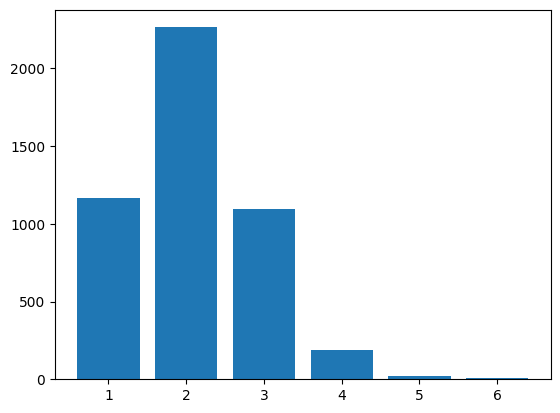

In [1456]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_30864\1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

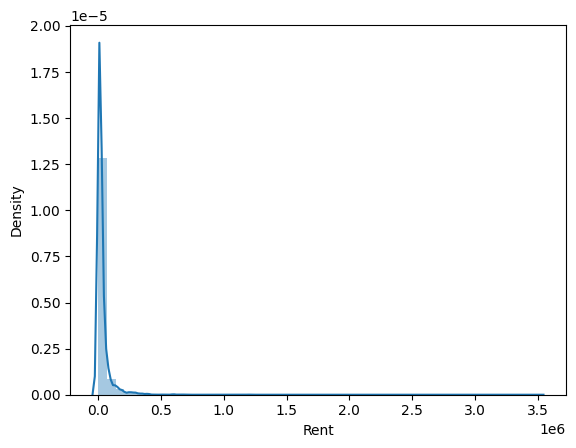

In [1457]:
sns.distplot(data['Rent'])

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_30864\1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

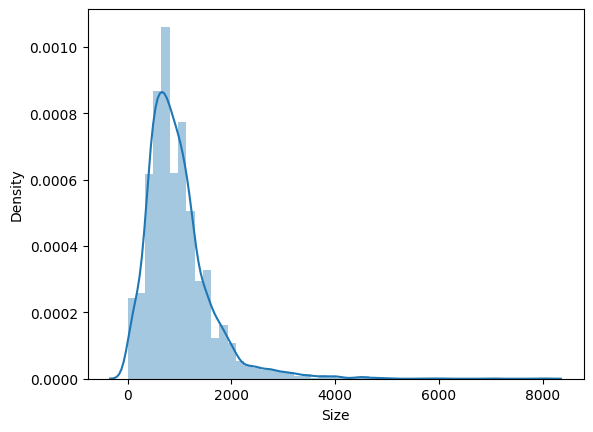

In [1458]:
sns.distplot(data['Size'])

In [1459]:
data['Floor'].value_counts()

Floor
0.500000    1122
1.000000     695
0.333333     541
0.250000     350
0.666667     347
            ... 
0.291667       1
0.404762       1
0.478261       1
0.595238       1
0.676471       1
Name: count, Length: 286, dtype: int64

In [1460]:
data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [1461]:
data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

In [1462]:
data = data[['BHK', 'Bathroom', 'Furnishing Status', 'Area Type', 'Size', 'Floor', 'Tenant Preferred', 'Rent']]

In [1463]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [1464]:
data = one_hot_encode(data, 'Furnishing Status')
data

,BHK,Bathroom,Area Type,City,Size,Floor,Rent,Semi-Furnished,Unfurnished
0,2,2,Super Area,Kolkata,1100,0.500000,10000,False,True
1,2,1,Super Area,Kolkata,800,0.333333,20000,True,False
2,2,1,Super Area,Kolkata,1000,0.333333,17000,True,False
3,2,1,Super Area,Kolkata,800,0.500000,10000,False,True
4,2,1,Carpet Area,Kolkata,850,0.500000,7500,False,True
...,...,...,...,...,...,...,...,...,...
4741,2,2,Carpet Area,Hyderabad,1000,0.600000,15000,True,False
4742,3,3,Super Area,Hyderabad,2000,0.250000,29000,True,False
4743,3,3,Carpet Area,Hyderabad,1750,0.600000,35000,True,False
4744,3,2,Carpet Area,Hyderabad,1500,0.676471,45000,True,False


In [1465]:
data = one_hot_encode(data, 'Area Type')
data

,BHK,Bathroom,City,Size,Floor,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area
0,2,2,Kolkata,1100,0.500000,10000,False,True,False,True
1,2,1,Kolkata,800,0.333333,20000,True,False,False,True
2,2,1,Kolkata,1000,0.333333,17000,True,False,False,True
3,2,1,Kolkata,800,0.500000,10000,False,True,False,True
4,2,1,Kolkata,850,0.500000,7500,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
4741,2,2,Hyderabad,1000,0.600000,15000,True,False,True,False
4742,3,3,Hyderabad,2000,0.250000,29000,True,False,False,True
4743,3,3,Hyderabad,1750,0.600000,35000,True,False,True,False
4744,3,2,Hyderabad,1500,0.676471,45000,True,False,True,False


In [1466]:
# data = one_hot_encode(data, 'City')
# data

,BHK,Bathroom,Size,Floor,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,2,1100,0.500000,10000,False,True,False,True,False,False,False,True,False
1,2,1,800,0.333333,20000,True,False,False,True,False,False,False,True,False
2,2,1,1000,0.333333,17000,True,False,False,True,False,False,False,True,False
3,2,1,800,0.500000,10000,False,True,False,True,False,False,False,True,False
4,2,1,850,0.500000,7500,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,1000,0.600000,15000,True,False,True,False,False,False,True,False,False
4742,3,3,2000,0.250000,29000,True,False,False,True,False,False,True,False,False
4743,3,3,1750,0.600000,35000,True,False,True,False,False,False,True,False,False
4744,3,2,1500,0.676471,45000,True,False,True,False,False,False,True,False,False


In [1467]:
data = one_hot_encode(data, 'Tenant Preferred')
data

In [1468]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [1469]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [1470]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1471]:
from sklearn import linear_model

model = linear_model.Ridge(alpha=0.1)
model.fit(X_train, y_train)
model.coef_

array([ 2861.81590596, 10213.94196529, 24239.56795786,  3045.33121663,
       -4125.68969055, -3831.52072881, -1606.195643  , -4421.54521627,
       -3676.67664365,  3116.020095  , -7022.40377112, -1145.57805174,
       21395.22952981])

In [1472]:
print(f"Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Regression-Test set score: {model.score(X_test, y_test):.2f}")

Regression-Training set score: 0.28
Regression-Test set score: 0.52


In [1473]:
### Quantitative Evaluation
y_preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 2861.81590596 10213.94196529 24239.56795786  3045.33121663
 -4125.68969055 -3831.52072881 -1606.195643   -4421.54521627
 -3676.67664365  3116.020095   -7022.40377112 -1145.57805174
 21395.22952981]
Mean squared error: 1922847850.64
Coefficient of determination: 0.52


In [1474]:
### Qualitative Evaluation
sample_data = X.iloc[0]

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_standardized

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.10773946,  0.03566558,  0.20927808, -0.20624431, -0.9501352 ,
         1.26702544, -0.96785055,  0.96887201, -0.48256379, -0.38453629,
        -0.46840421,  2.88959404, -0.50567406]])

In [1475]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

25724.238446980584

In [1476]:
y.iloc[0]

10000